## Model Training

### Data Reading

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_excel("df_final.xlsx")

In [4]:
df.head(7)

,DATE,labor_percent,total_emp_cons,new_private_house,GDP,p_saving_rate,PPI_Cement,permit,income,IPI_Cement,...,MSPUS,target,PPI_Concrete,all_Const_Emp,emratio,monthly_supply,unemployed_rate,house_st,population,new_private_hw_under
0,1987-01-01,65.4,5007,9402.222449,4722.156,9.4,100.1,1690,3820.2,123.7373,...,97900,63.735,4.703204,722.3,61.0,6.0,6.6,1774,241857,1090
1,1987-02-01,65.5,5038,8834.309923,4722.156,8.2,100.8,1689,3845.0,123.1670,...,97900,64.135,4.703204,724.2,61.1,6.2,6.6,1784,242005,1096
2,1987-03-01,65.5,5039,8359.282565,4722.156,8.1,101.2,1704,3863.8,122.5706,...,97900,64.470,4.703204,727.9,61.2,6.0,6.6,1726,242166,1084
3,1987-04-01,65.4,5053,8611.578609,4806.160,4.1,100.8,1601,3875.4,123.5345,...,103400,64.973,4.703204,728.1,61.3,6.0,6.3,1614,242338,1079
4,1987-05-01,65.7,5080,8476.017290,4806.160,7.8,101.2,1500,3908.6,123.8454,...,103400,65.547,4.697749,727.6,61.6,6.7,6.3,1628,242516,1070
5,1987-06-01,65.5,5086,7998.834983,4806.160,7.3,101.2,1522,3919.7,123.3012,...,103400,66.218,4.697749,728.5,61.4,6.9,6.2,1594,242706,1060
6,1987-07-01,65.6,5092,8304.098284,4884.555,7.1,101.1,1516,3942.1,127.3025,...,106000,66.786,4.697749,732.1,61.6,6.7,6.1,1575,242908,1051


In [5]:
df.tail(7)

,DATE,labor_percent,total_emp_cons,new_private_house,GDP,p_saving_rate,PPI_Cement,permit,income,IPI_Cement,...,MSPUS,target,PPI_Concrete,all_Const_Emp,emratio,monthly_supply,unemployed_rate,house_st,population,new_private_hw_under
437,2023-06-01,62.6,7955,7138.487870,27063.012,4.9,328.710,1441,22941.5,97.0416,...,418500,308.307,5.821432,929.5,60.3,7.5,3.6,1418,335163,1673
438,2023-07-01,62.6,7967,6583.691765,27623.543,4.1,331.181,1443,22994.3,94.5577,...,431000,310.162,5.821432,922.6,60.4,7.0,3.5,1451,335329,1673
439,2023-08-01,62.3,7997,7425.127720,27063.521,5.1,332.180,1423,21989.4,95.5070,...,442000,311.499,5.791320,924.2,60.2,8.2,3.4,1436,321220,1673
440,2023-09-01,62.6,8010,7209.939958,27803.503,4.9,315.189,2737,21676.3,91.6707,...,438000,301.405,5.818346,929.0,60.5,7.5,3.3,1425,313359,1673
441,2023-10-01,62.7,8033,7079.051358,27600.501,5.5,333.186,1473,22492.3,92.6688,...,448000,303.298,5.763387,933.7,59.4,8.9,3.1,1458,318324,1673
442,2023-11-01,62.8,8023,6589.547161,26703.320,5.4,324.187,1486,21994.1,93.6447,...,423000,299.675,5.797288,924.1,59.8,8.5,3.7,1460,328329,1673
443,2023-12-01,62.9,8043,7377.201144,26723.870,5.8,311.162,1468,21921.7,96.5907,...,452000,300.609,5.933372,930.3,60.7,7.8,3.5,1425,367329,1673


### Data splitting and Scaling

In [6]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [10]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.17696819659432, tolerance: 111.36901429426186
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.46672022224539, tolerance: 111.36901429426186
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.0448510773722, tolerance: 111.36901429426186
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergen

In [11]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0126
Mean Squared Error (MSE): 16.25
RMSE: 4.031048
R-squared (R2): 0.99


### Cross validation

In [12]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.78637729862885, tolerance: 83.12310878170655
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.9819007794331, tolerance: 83.12310878170655
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.1942536561046, tolerance: 83.12310878170655
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

Cross-Validation R-squared Scores:
[0.99549101 0.99633847 0.99524329 0.99473931 0.99507986]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.19620984050653, tolerance: 92.67883140378844
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.83735930466128, tolerance: 92.67883140378844
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.83664124152756, tolerance: 92.67883140378844
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

In [13]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9954
Standard Deviation of R-squared: 0.0005


In [14]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.4031047999326563
14.297745270270262


### Most Prominent features and least prominent features

In [16]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [17]:
non_zero_coefficients_df

,Feature,Coefficient
0,labor_percent,5.872566
1,total_emp_cons,-5.644055
3,GDP,25.443967
4,p_saving_rate,-0.749873
5,PPI_Cement,-6.022079
6,permit,-2.580253
8,IPI_Cement,1.685986
9,mortgage_rate,-2.389226
10,home_ow_rate,-0.897918
11,MSPUS,29.067722


In [18]:
zero_coefficients_df

,Feature,Coefficient
2,new_private_house,0.0
7,income,0.0


### Predicted vs Observed

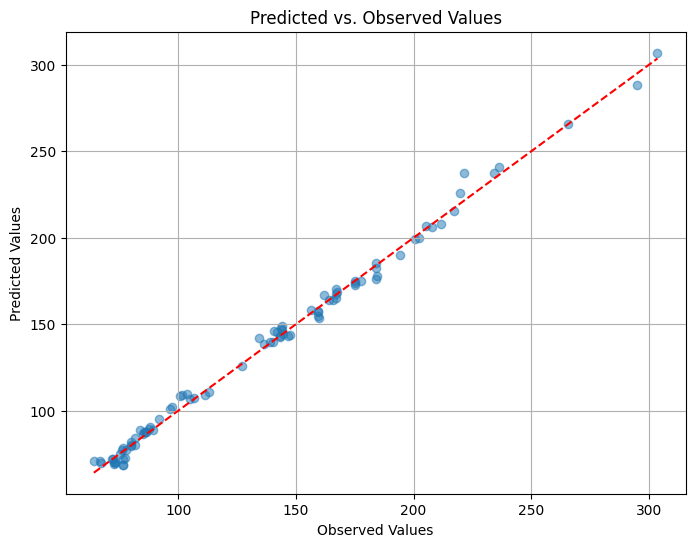

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()